Name : Mahesh Jagtap

Reg No : 24MCS1017

**DL LAB ASSIGNMENT 7: Visualizing CNN's learning**


Objective : To analyze and visualize how CNNs extract hierarchical features from images by observing learned filters, intermediate feature maps, and the impact of kernel sizes and convolutional layers.

**1.Import the required libraries:**


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2


**Dataset Description:**

The dataset used in this assignment consists of images of cats and dogs, stored in a zip file (CatDog.zip). It is extracted into the /content/data directory, containing separate folders for training and testing.

Training Set: Located in /content/data/train, further split into training (80%) and validation (20%) subsets.
Test Set: Stored in /content/data/test, used for model evaluation.
The images are resized to 150x150 pixels, normalized by rescaling pixel values to the range [0,1], and loaded using ImageDataGenerator. The dataset is structured for binary classification, where images are labeled as either a cat (0) or a dog (1).

**2.Load and Preprocess the Dataset**

In [ ]:
import zipfile
import os

zip_path = "/content/CatDog.zip"
extract_path = "/content/data"

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
os.listdir(extract_path)


# Define dataset directories
train_dir = "/content/data/train"
test_dir = "/content/data/test"

# Data augmentation & rescaling
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training & validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


**Step 3: Build the CNN Model**

In [ ]:
# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (cats vs dogs)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

The CNN model consists of three convolutional layers with 3×3 kernels, increasing filters (32, 64, 128), and max pooling (2×2) after each layer to downsample features. Feature maps extracted at each stage capture edges (low-level), patterns (mid-level), and object structures (high-level). The final fully connected layers (Dense 512, Dropout 0.5) process the extracted features for binary classification (cat vs. dog).

**Step 4: Train the Model**

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 590ms/step - accuracy: 0.4707 - loss: 1.2552 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.5247 - loss: 0.6942 - val_accuracy: 0.6000 - val_loss: 0.6889
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.5819 - loss: 0.6852 - val_accuracy: 0.5818 - val_loss: 0.6813
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.6293 - loss: 0.6763 - val_accuracy: 0.6818 - val_loss: 0.6659
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.6124 - loss: 0.6621 - val_accuracy: 0.6182 - val_loss: 0.6825
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.7455 - loss: 0.5844 - val_accuracy: 0.6364 - val_loss: 0.6516
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.7568 - loss: 0.5071 - val_accuracy: 0.5909 - val_loss: 0.7141
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.7790 - loss: 0.4524 - val_accuracy: 0

**Step 5: Visualize Training Performance**

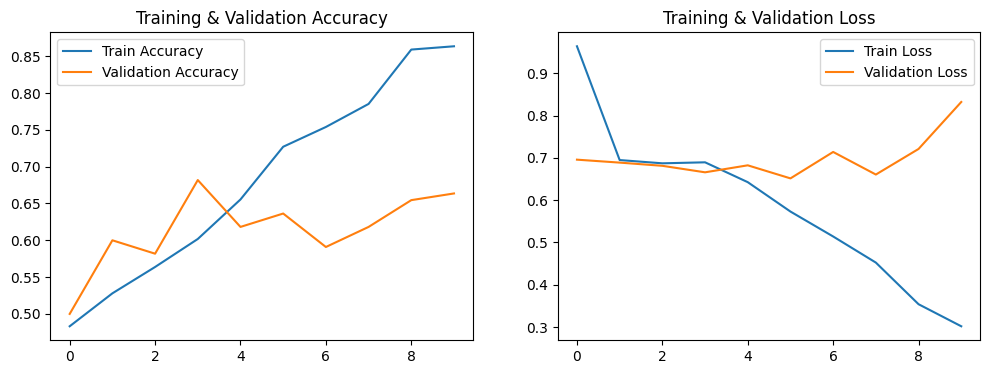

In [ ]:
# Plot training accuracy & loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


Training & Validation Accuracy (Left Graph):

Training accuracy steadily increases, reaching around 85%.
Validation accuracy fluctuates and lags behind training accuracy, peaking near 65%, suggesting potential overfitting.


Training & Validation Loss (Right Graph):
Training loss decreases consistently, indicating the model is learning.
Validation loss fluctuates and starts increasing towards the end, confirming overfitting.


Key Observations:
Model learns well on training data.
Validation accuracy does not improve much.
Overfitting is present—regularization (dropout, data augmentation) may help.

**Step 6: Visualize Filters of CNN Layers**

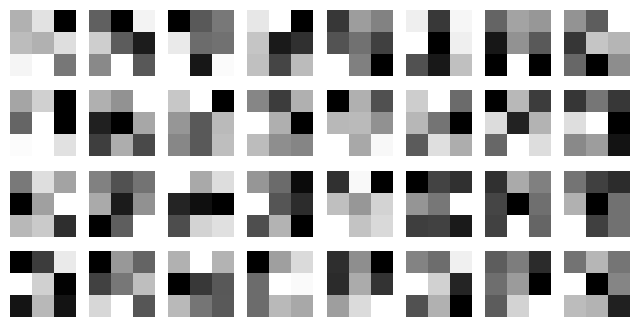

In [ ]:
# Extract filters and biases from first convolutional layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values for visualization
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Plot filters
fig, axes = plt.subplots(4, 8, figsize=(8, 4))
axes = axes.flatten()
for i in range(32):
    f = filters[:, :, :, i]
    f = np.mean(f, axis=-1)  # Convert to grayscale
    axes[i].imshow(f, cmap='gray')
    axes[i].axis('off')
plt.show()


**Step 7: Visualize Feature Maps of CNN Layers**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


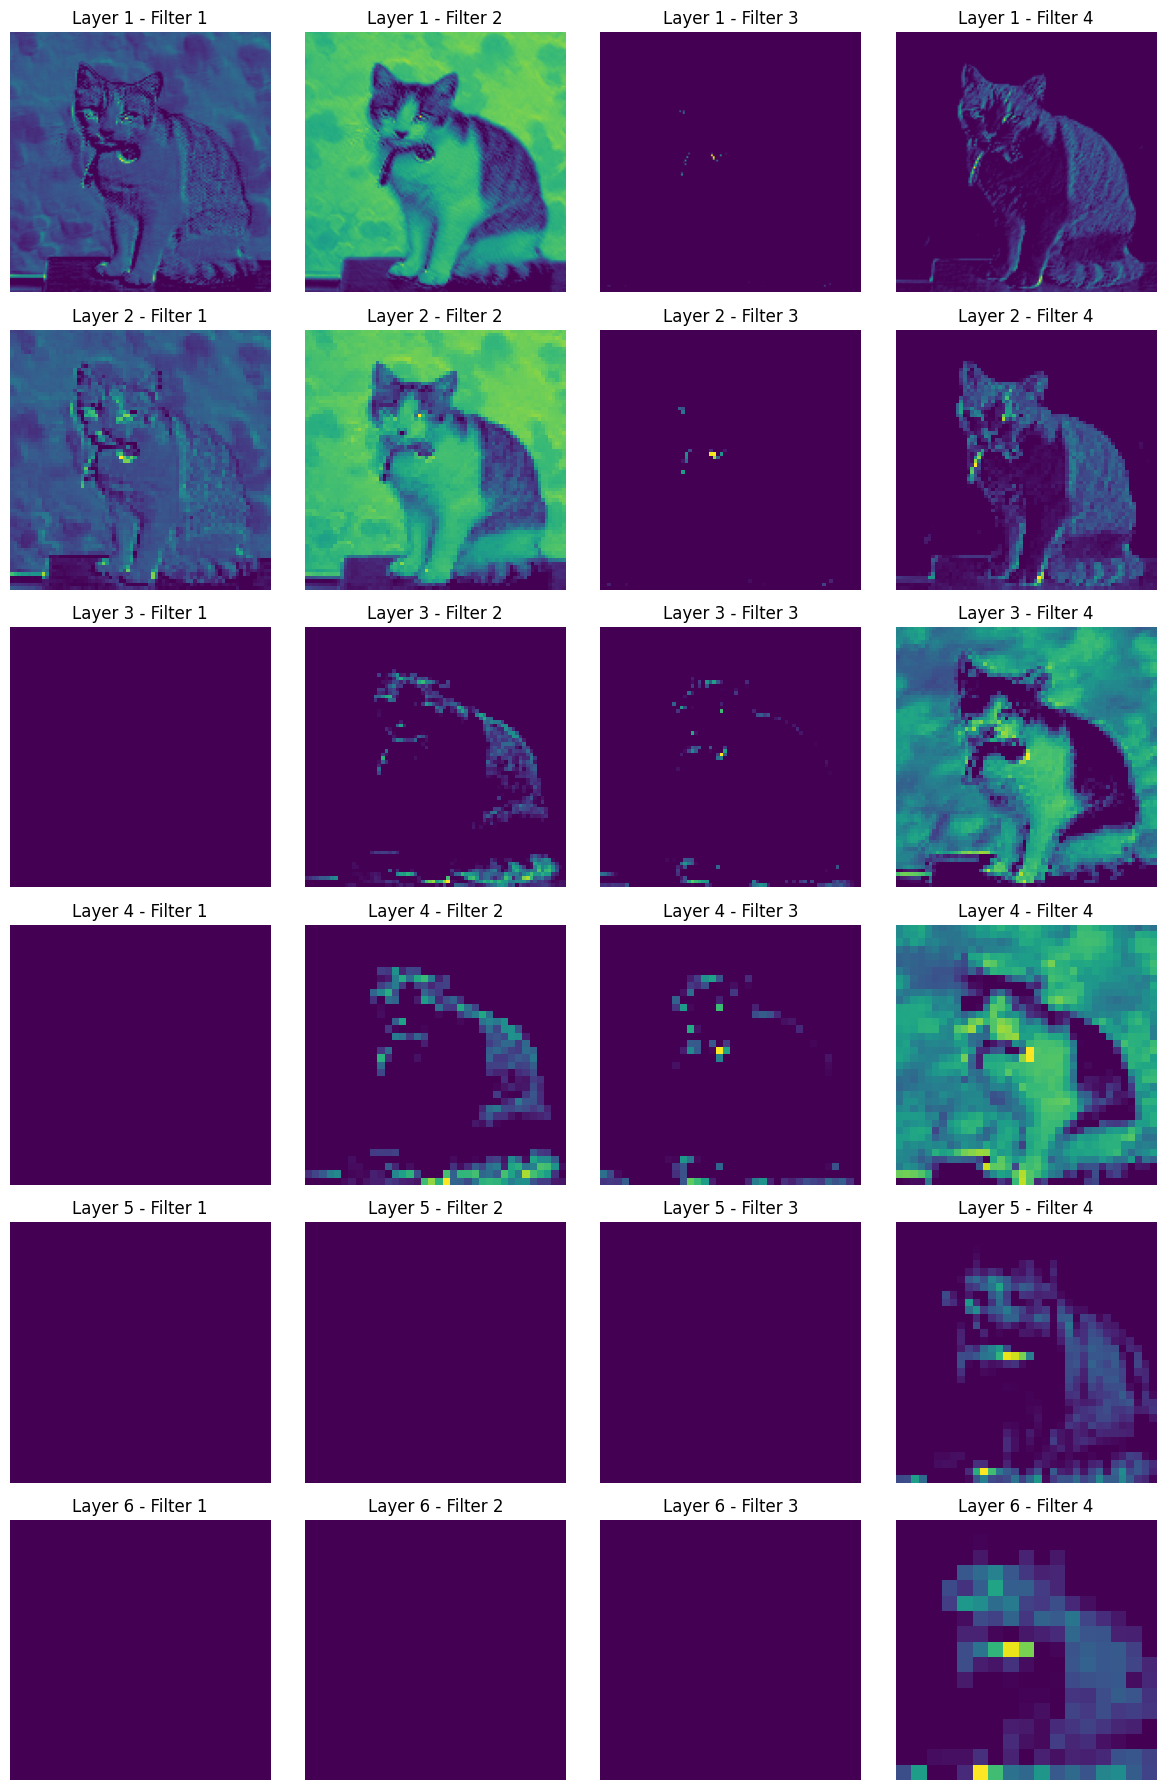

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model

# Ensure model is built
for batch in train_generator:
    model.predict(batch[0])
    break  # Run once to initialize model

# Extract the first few layers to visualize
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

# Load and preprocess an image from the test set
img_path = test_generator.filepaths[0]
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150)) / 255.0
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Get feature maps
feature_maps = activation_model.predict(img)

# Plot feature maps for each convolutional and pooling layer
fig, axes = plt.subplots(len(feature_maps), 4, figsize=(12, len(feature_maps) * 3))

for i, feature_map in enumerate(feature_maps):
    # Get the number of filters in the current feature map
    num_filters = min(feature_map.shape[-1], 4)  # Show only 4 filters per layer

    for j in range(num_filters):
        ax = axes[i, j] if len(feature_maps) > 1 else axes[j]
        ax.imshow(feature_map[0, :, :, j], cmap='viridis')
        ax.axis('off')
        ax.set_title(f"Layer {i+1} - Filter {j+1}")

plt.tight_layout()
plt.show()


**Conclusion:**

The feature map visualization helps to understand how a CNN extracts important features from an image at different layers:  

1. **Early Layers (Edge & Texture Detection)**  
   - The first few convolutional layers detect **basic patterns** like edges, lines, and simple textures.  
   - These feature maps highlight contrasts and boundaries within the image.  

2. **Middle Layers (Shape & Object Parts Detection)**  
   - As the network goes deeper, the filters recognize **parts of objects**, such as eyes, ears, or fur textures.  
   - The feature maps become more complex, focusing on **local structures** rather than simple edges.  

3. **Deeper Layers (Abstract Feature Representation)**  
   - The final convolutional layers detect **higher-level patterns**, such as the overall shape of a cat or dog.  
   - The feature maps appear **less interpretable** but contain the most essential information for classification.  

4. **Pooling Layers (Dimensionality Reduction)**  
   - Max pooling reduces the feature map size, keeping **important features** while discarding unnecessary details.  
   - This makes the network more efficient and robust to variations like position changes or slight distortions.  

**References:**

[1] https://www.kaggle.com/datasets/mahmudulhaqueshawon/catcat

[2] https://www.geeksforgeeks.org/visualizing-representations-of-outputs-activations-of-each-cnn-layer/

[3] https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn

[4]https://in.mathworks.com/help/deeplearning/ug/visualize-features-of-a-convolutional-neural-network.html